In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/titanic_train.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop "cabin" feature:

In [3]:
data = data.drop("Cabin", axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


From info, we can see that there are 891 columns. Features "age" and "Embarked"
has missing values. Drop rows with missing values.

In [5]:
data = data.dropna()
data.shape

(712, 11)

**Question 1.** Build a picture to visualize all scatter plots for each pair of features
Age, Fare, SibSp, Parch and Survived (scatter_matrix from Pandas or pairplot
from Seaborn)

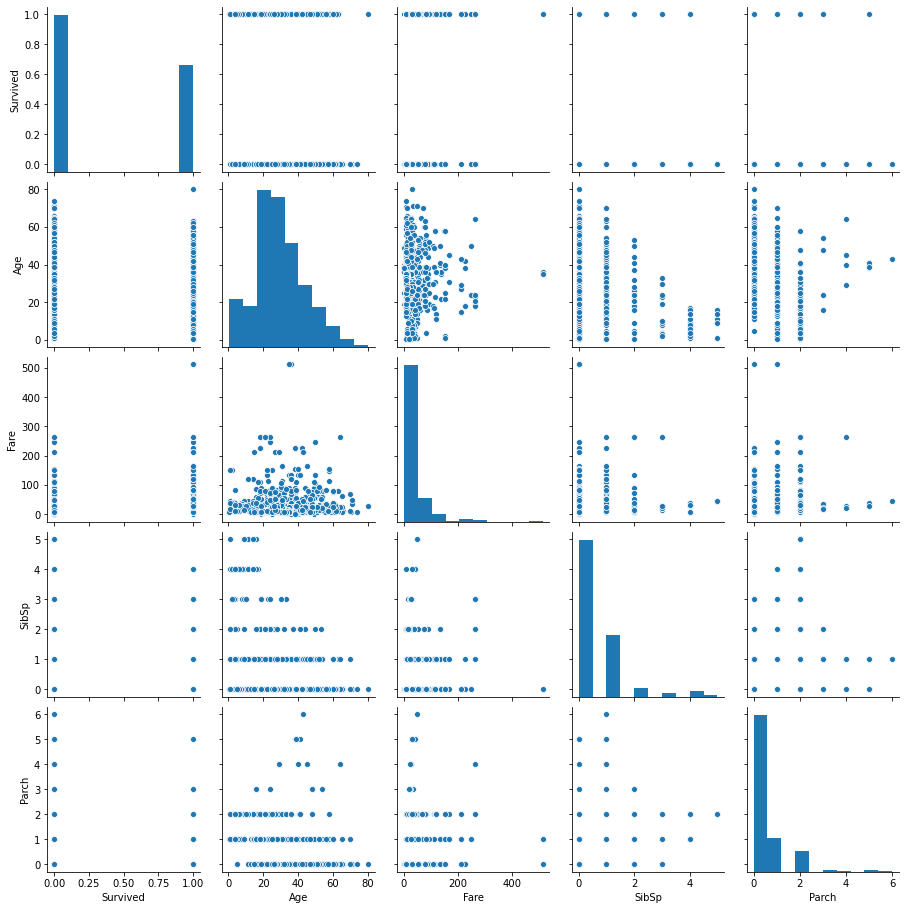

In [6]:
features = ["Survived", "Age", "Fare", "SibSp", "Parch"]
sns.pairplot(data[features])

**Question 2.** How does ticket price (Fare) depend on Pclass? Build a boxplot.

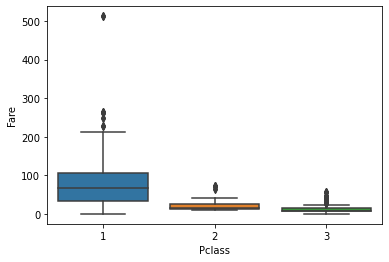

In [7]:
sns.boxplot(x = "Pclass", y = "Fare",  data = data)

**Question 3.** Let's build the same plot but restricting values of Fare to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).

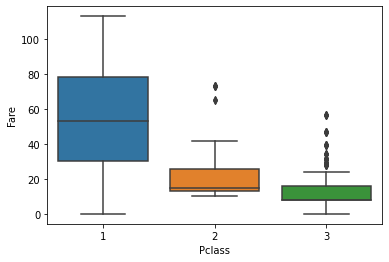

In [8]:
filtered_data = data[data["Fare"] < data["Fare"].quantile(0.95)]

sns.boxplot(x = "Pclass", y = "Fare", data = filtered_data)

**Question 4.** How is the percentage of surviving passengers dependent on passengers'
gender? Depict it with Seaborn.countplot using the hue argument. 

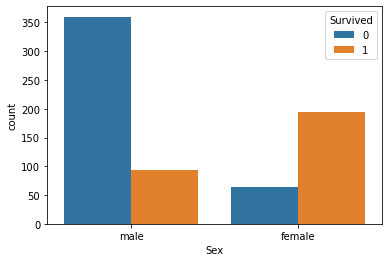

In [9]:
sns.countplot(x = "Sex", hue = "Survived", data = data)

**Question 5.** How does the distribution of ticket prices differ for those who survived
and those who didn't. Depict it with Seaborn.boxplot

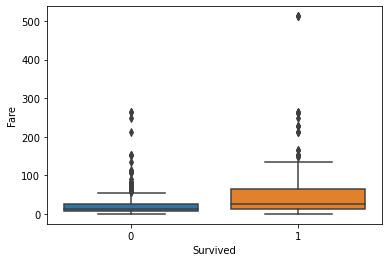

In [10]:
sns.boxplot(x = "Survived", y = "Fare", data = data)

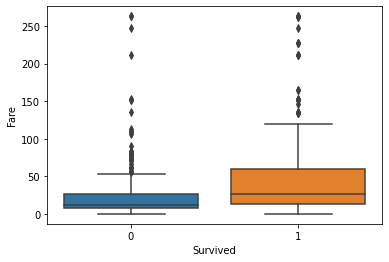

In [11]:
# Let's build the same plot but remove the outlier at 500
filtered_data2 = data[data["Fare"] < 500]

sns.boxplot(x = "Survived", y = "Fare", data = filtered_data2)

**Question 6.** How does survival depend on passengers' age? Verify (graphically) an 
assumption that youngsters (< 30 y.o.) survived more frequently than old
people (> 55 y.o.).

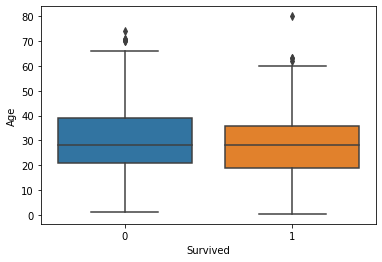

In [12]:
sns.boxplot(x = "Survived", y = "Age", data = data)

Age distribution between Survived and not are close.

Let's further refine based on passengers' Pclass.

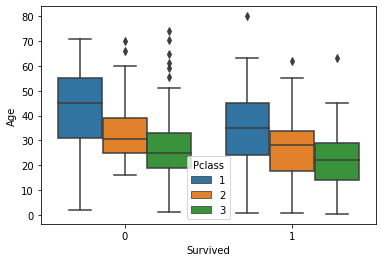

In [13]:
sns.boxplot(x ="Survived", y = "Age", hue = "Pclass", data = data)

Distribution of age based on Pclass is similar between survived and not, let count the data instead.

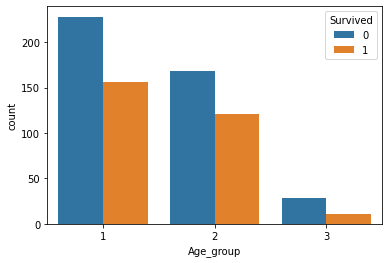

In [14]:
data ["Age_group"] = data["Age"].apply(lambda a : 1 if (a < 30) else
                                       (3 if (a > 55) else 2))

sns.countplot(x = "Age_group", hue = "Survived", data = data)